In [1]:
#importing libraries
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read the csv file
loan=pd.read_csv(r'loan.csv')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# finding duplicates in the data  
duplicate_loan_values=loan[loan.duplicated(['id'])]
duplicate_loan_values

#No duplicates found in the data 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [5]:
loan.shape

(39717, 111)

In [6]:
# finding null values in data 

loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# Removing null values from the data 

In [7]:
loan.dropna(axis=1,how='all',inplace=True)

In [8]:
loan.shape

(39717, 57)

In [9]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


# Removing irrevelant data from analysis

In [10]:
loan.drop([ 'initial_list_status','pymnt_plan','policy_code','collections_12_mths_ex_med', 'application_type', 'acc_now_delinq','pub_rec_bankruptcies','delinq_amnt', 'tax_liens'], axis = 1, inplace = True)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,Jun-07,NaN


# The above remaining columns corresponds to post loan approval 

1) It is seen  that the some columns like "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state" ,"desc" do not contribute anything so removing this columns  

2) "out_prncp_inv" , "total_pymnt_inv " are useful for investors but not contributing to the loan defaulting analysis. So removing them.

In [11]:
loan.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv"],axis=1,inplace=True)
loan.shape

(39717, 37)

In [12]:
loan.drop(['total_rec_prncp','total_rec_int','total_rec_late_fee','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','chargeoff_within_12_mths'],axis=1,inplace=True)

In [13]:
loan.shape

(39717, 29)

In [14]:
loan.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq    25682
mths_since_last_record    36931
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
total_pymnt                   0
recoveries                    0
dtype: int64

In [15]:
loan.revol_util 

0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 39717, dtype: object

In [16]:
loan.revol_util.isnull().sum()

50

In [17]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt             39717 non-null  int64  
 2   funded_amnt_inv         39717 non-null  float64
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_length              38642 non-null  object 
 9   home_ownership          39717 non-null  object 
 10  annual_inc              39717 non-null  float64
 11  verification_status     39717 non-null  object 
 12  issue_d                 39717 non-null  object 
 13  loan_status             39717 non-null  object 
 14  purpose                 39717 non-null

In [18]:
# droping na values in revol_util 
loan.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan.revol_util.isna().sum()

0

In [19]:
loan.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1072
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq    25645
mths_since_last_record    36883
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
total_pymnt                   0
recoveries                    0
dtype: int64

In [20]:
# Data cleaning
# format employment length column to have only numbers
loan.emp_length.fillna('0',inplace=True)
loan['emp_length']=loan.emp_length.str.extract('(\d+)')
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,recoveries
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,...,NaN,NaN,3,0,13648,83.70%,9,0.00,5863.155187,0.00
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,1,RENT,...,NaN,NaN,3,0,1687,9.40%,4,0.00,1008.710000,117.08
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,RENT,...,NaN,NaN,2,0,2956,98.50%,10,0.00,3005.666844,0.00
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,RENT,...,35.0,NaN,10,0,5598,21%,37,0.00,12231.890000,0.00
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1,RENT,...,38.0,NaN,15,0,27783,53.90%,38,524.06,3513.330000,0.00


In [21]:
loan.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq    25645
mths_since_last_record    36883
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
total_pymnt                   0
recoveries                    0
dtype: int64

In [22]:
# remove % symbol from interest rate column
loan['int_rate'] = loan['int_rate'].str.rstrip('%')

# remove % symbol from revol_util column 
loan['revol_util'] = loan['revol_util'].str.rstrip('%')

In [23]:
# convert amount columns into numeric data 

cols1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan[cols1] = loan[cols1].apply(pd.to_numeric)

<AxesSubplot:xlabel='annual_inc'>

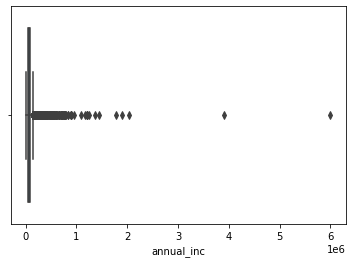

In [24]:
sns.boxplot(loan.annual_inc)

In [25]:
# Remove Outliers quantile 0.95 from Annual Income

loan = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.95)]

(loan["annual_inc"].describe())

count     37682.000000
mean      61078.034434
std       27786.361842
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      141996.000000
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

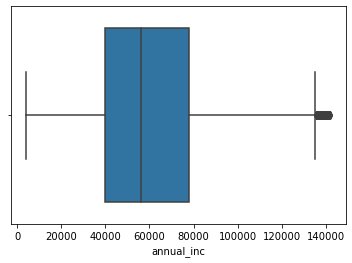

In [26]:
sns.boxplot(loan.annual_inc)

<AxesSubplot:xlabel='int_rate'>

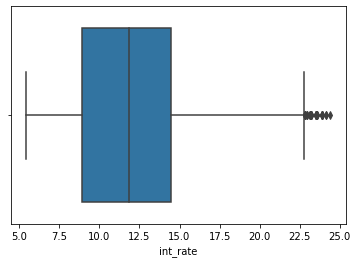

In [27]:
sns.boxplot(loan.int_rate)

In [28]:
# Correlation Matrix-Quantitative Variables

loan_correlation = loan.corr()
loan_correlation 

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,total_pymnt,recoveries
loan_amnt,1.000000,0.981744,0.939047,0.300052,0.929449,0.162256,0.402726,0.094405,-0.037074,-0.000663,0.022384,0.009888,0.164902,-0.046264,0.315234,0.238202,0.193860,0.881621,0.137746
funded_amnt,0.981744,1.000000,0.957155,0.304720,0.955181,0.161859,0.398326,0.093862,-0.037241,0.000046,0.023310,-0.002593,0.162878,-0.047377,0.307461,0.232886,0.195582,0.898092,0.139903
funded_amnt_inv,0.939047,0.957155,1.000000,0.298938,0.902243,0.170327,0.381867,0.101523,-0.043716,-0.014045,0.078938,0.438018,0.150634,-0.049003,0.288585,0.225476,0.204420,0.875602,0.127095
int_rate,0.300052,0.304720,0.298938,1.000000,0.275485,0.015105,0.060006,0.113865,0.154526,0.133465,-0.052679,0.321206,-0.003203,0.102385,0.084095,-0.060642,0.130110,0.298325,0.120719
installment,0.929449,0.955181,0.902243,0.275485,1.000000,0.133755,0.398514,0.081698,-0.024893,0.000521,0.007958,-0.060195,0.159645,-0.041853,0.307082,0.212258,0.124938,0.852024,0.120763
emp_length,0.162256,0.161859,0.170327,0.015105,0.133755,1.000000,0.213275,0.059110,0.013667,0.008894,0.045000,0.186734,0.099857,0.051939,0.159644,0.203910,0.052132,0.147548,0.023376
annual_inc,0.402726,0.398326,0.381867,0.060006,0.398514,0.213275,1.000000,-0.074052,0.030949,0.029048,-0.003877,0.047153,0.263001,-0.011711,0.397773,0.384514,0.056798,0.380537,0.039494
dti,0.094405,0.093862,0.101523,0.113865,0.081698,0.059110,-0.074052,1.000000,-0.032340,0.006826,0.067499,0.178808,0.299131,-0.006875,0.272516,0.246586,0.042769,0.092227,0.026014
delinq_2yrs,-0.037074,-0.037241,-0.043716,0.154526,-0.024893,0.013667,0.030949,-0.032340,1.000000,0.008388,-0.568194,-0.040727,0.014153,0.007564,-0.061637,0.068158,-0.005433,-0.028426,0.011130
inq_last_6mths,-0.000663,0.000046,-0.014045,0.133465,0.000521,0.008894,0.029048,0.006826,0.008388,1.000000,-0.002219,-0.016446,0.090451,0.027708,-0.027677,0.107614,-0.009357,-0.020485,0.016987


In [29]:
loan.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq    24427
mths_since_last_record    34989
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
total_pymnt                   0
recoveries                    0
dtype: int64

In [30]:

# create month and year columns separately

loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan['issue_d'].dt.year
loan['month']=loan['issue_d'].dt.month

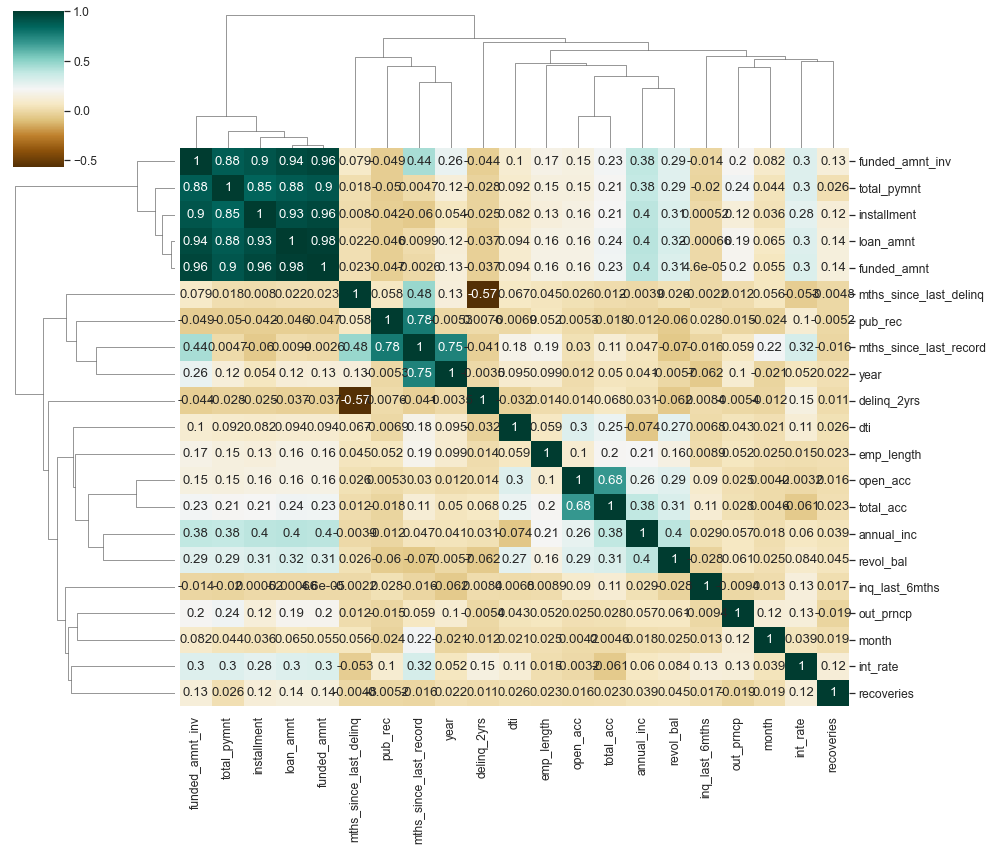

In [31]:
#Heat Map 
loan_correlation = loan.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(14, 12),cmap="BrBG")
plt.show()

# Observation is that Loan amount and funding amount are strongly correlated.
# Annual income with DTI(Debt-to-income ratio) is negatively correalted.
# Debt income ratio is the percentage of a consumer's monthly gross income that goes toward paying debts. 
# That means when annual income is low DTI is high & vice versa.
# positive correlation between annual income and employment years.
# That means income increases with work experience

# Getting count of fully paid, current and  charged off Applicants

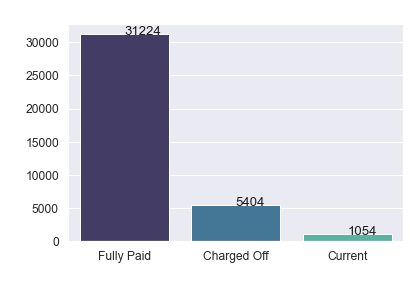

In [32]:
ax = sns.countplot(x="loan_status",data=loan,palette='mako')
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
s=loan['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

# Observations :
# Below plot shows that close to 14% loans were charged off out of total loan issued.

### Analyzing the purpose for taking loans 

<AxesSubplot:xlabel='count', ylabel='purpose'>

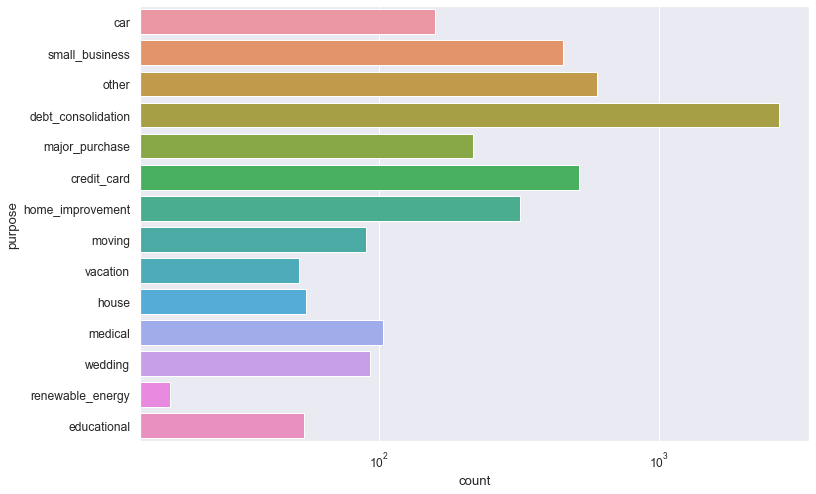

In [33]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan[loan.loan_status == 'Charged Off'])

# It is have applicant with small business ,credit card and debt_consolidation have higher chances of charge off 

### Analyzing home ownership

In [34]:
# checking unique values from home ownership 
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [35]:
# Replacing None with other 
loan['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

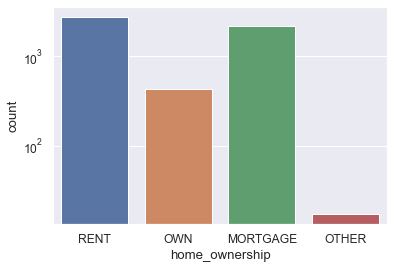

In [36]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan[loan['loan_status']=='Charged Off'])

# observed that applicant with Rent and Mortgage Charge off is high 

In [37]:
# Bivariate Analysis on grade against Chargedoff_Proportion

grade_vs_loan = loan.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged off is increasing with grade moving from "A" towards "G"

loan_status,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
6,G,93,14,167,274,0.339416
5,F,286,57,595,938,0.304904
4,E,656,163,1781,2600,0.252308
3,D,1078,208,3744,5030,0.214314
2,C,1321,248,6149,7718,0.171158
1,B,1377,325,9727,11429,0.120483
0,A,593,39,9061,9693,0.061178


In [38]:
# Creating bins to make data categorical
loan['total_acc_groups'] = pd.cut(loan['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan['annual_inc_groups'] = pd.cut(loan['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loan['int_rate_groups'] = pd.cut(loan['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan['open_acc_groups'] = pd.cut(loan['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])

<AxesSubplot:xlabel='emp_length', ylabel='count'>

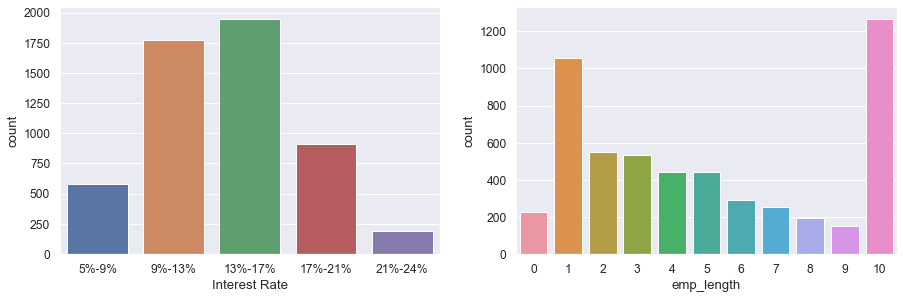

In [39]:
# Analysis interest rate wrt  interest rate bins created 
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan[loan.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=loan[loan.loan_status == 'Charged Off'])

# observtion 
# It is seen that charge off is highest in interest rate of 13-17% 

### Also analyzing total_acc,annual_inc and open_acc

<AxesSubplot:xlabel='total_acc_groups', ylabel='count'>

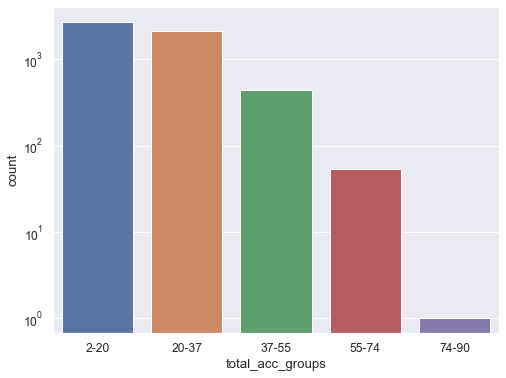

In [40]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=loan[loan.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='annual_inc_groups', ylabel='count'>

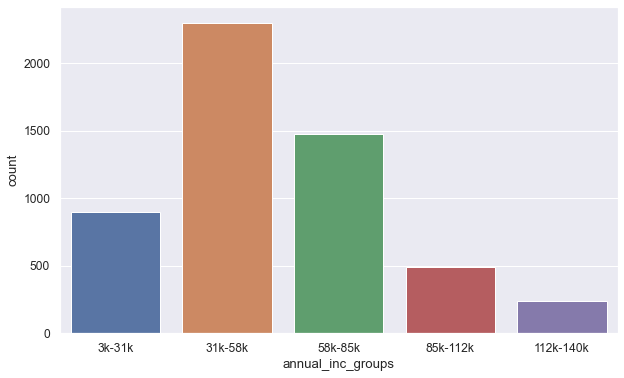

In [41]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=loan[loan.loan_status == 'Charged Off'])

# Observations 
#Charge off is higher for income range of 31k-58k

<AxesSubplot:xlabel='open_acc_groups', ylabel='count'>

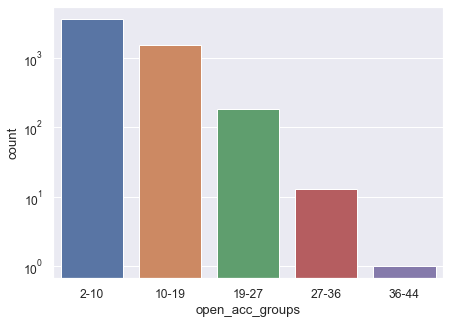

In [42]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loan[loan.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='verification_status', ylabel='count'>

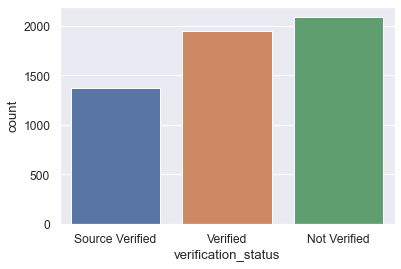

In [43]:
sns.countplot(x='verification_status', data=loan[loan['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='count', ylabel='term'>

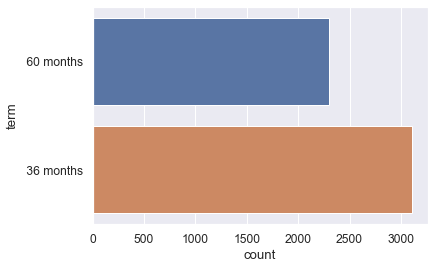

In [44]:
sns.countplot(y='term', data=loan[loan['loan_status']=='Charged Off'])

#Observation 
#charge off is higher if term is for 36 months 

## Analyzing by issued month and year

<AxesSubplot:xlabel='year', ylabel='count'>

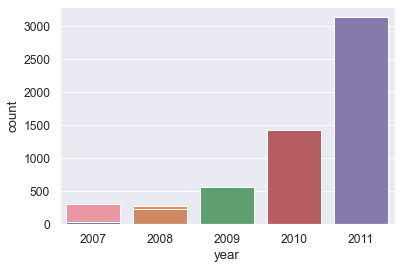

In [45]:
sns.countplot(x='month', data=loan[loan['loan_status']=='Charged Off'])
sns.countplot(x='year', data=loan[loan['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='month', ylabel='count'>

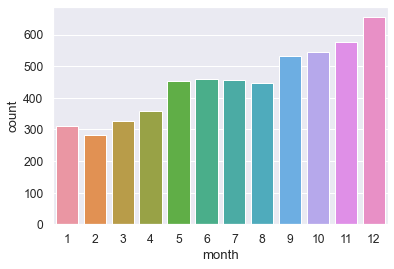

In [46]:
sns.countplot(x='month', data=loan[loan['loan_status']=='Charged Off'])

#observation 
#It is seen that for month 12 th i.e december and year 2011 charge off is highesst 

### It is observed that year 2011 and last month i.e December have high probability of defaulting 

### Analyzing installment ,loan_amt and dti 

In [47]:
loan['installment_groups'] = pd.cut(loan['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan['loan_amnt_groups'] = pd.cut(loan['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan['dti_groups'] = pd.cut(loan['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<AxesSubplot:xlabel='installment_groups', ylabel='count'>

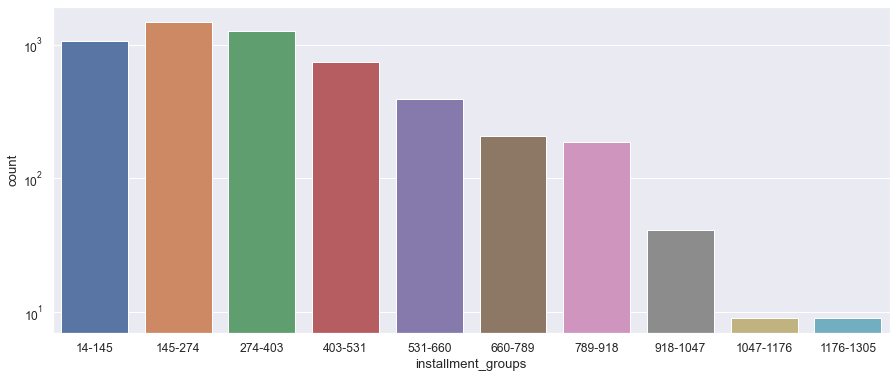

In [48]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan[loan['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='loan_amnt_groups', ylabel='count'>

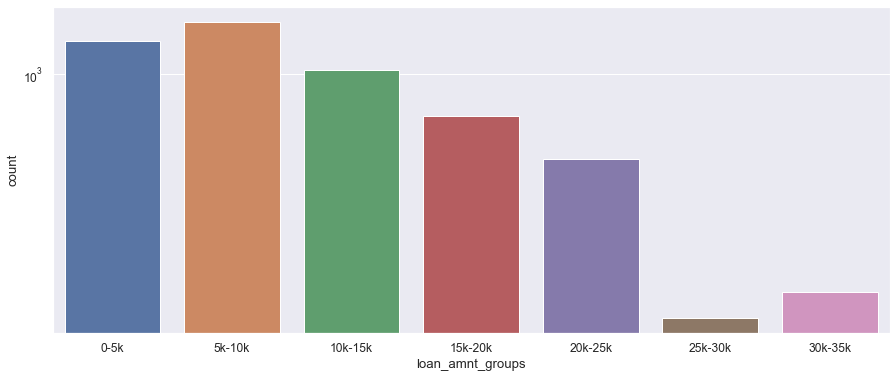

In [49]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan[loan['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='dti_groups', ylabel='count'>

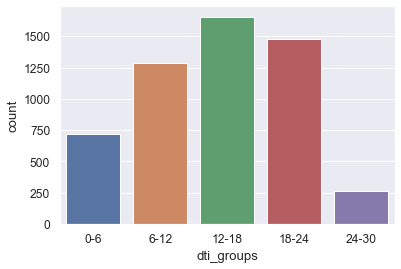

In [50]:
sns.countplot(x='dti_groups', data=loan[loan['loan_status']=='Charged Off'])

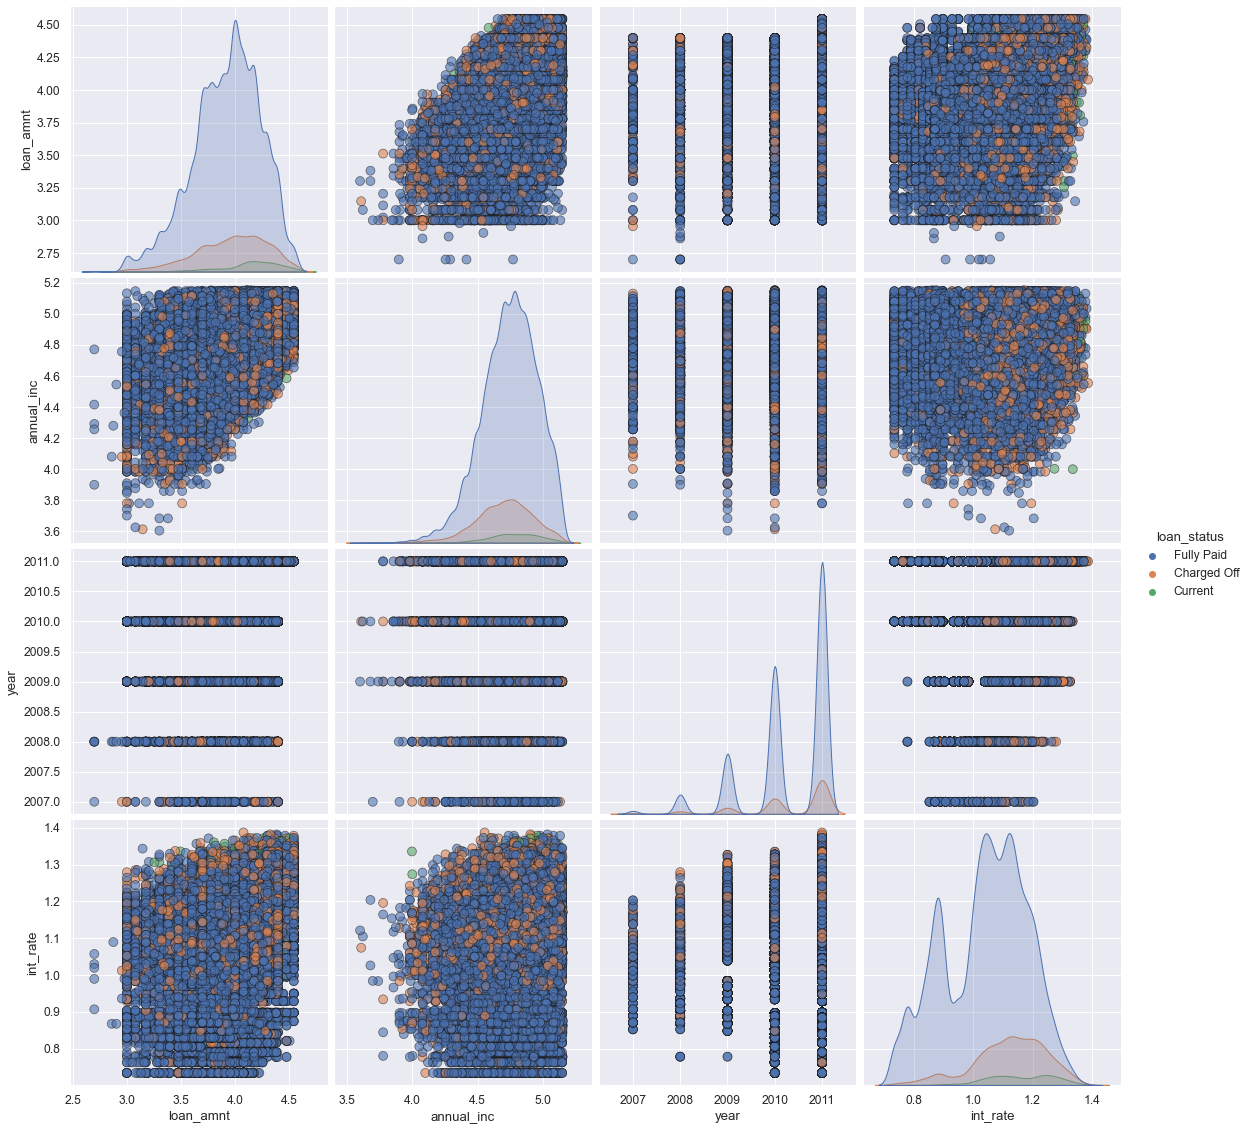

In [51]:
#  multivariate analysis


loan_pair = loan[['loan_amnt', 'annual_inc', 'year','int_rate','loan_status']].copy()
loan_pair.head()

# Take the log of below variables as they are heavily skewed
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

# Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

# Observation:
# Higher the intrest rate higher charged off ratio
# Higher the annual income higher the loan amount slightly.
# increase in number of charged off with increase in year.
# intrest rate is increasing with loan amount increase

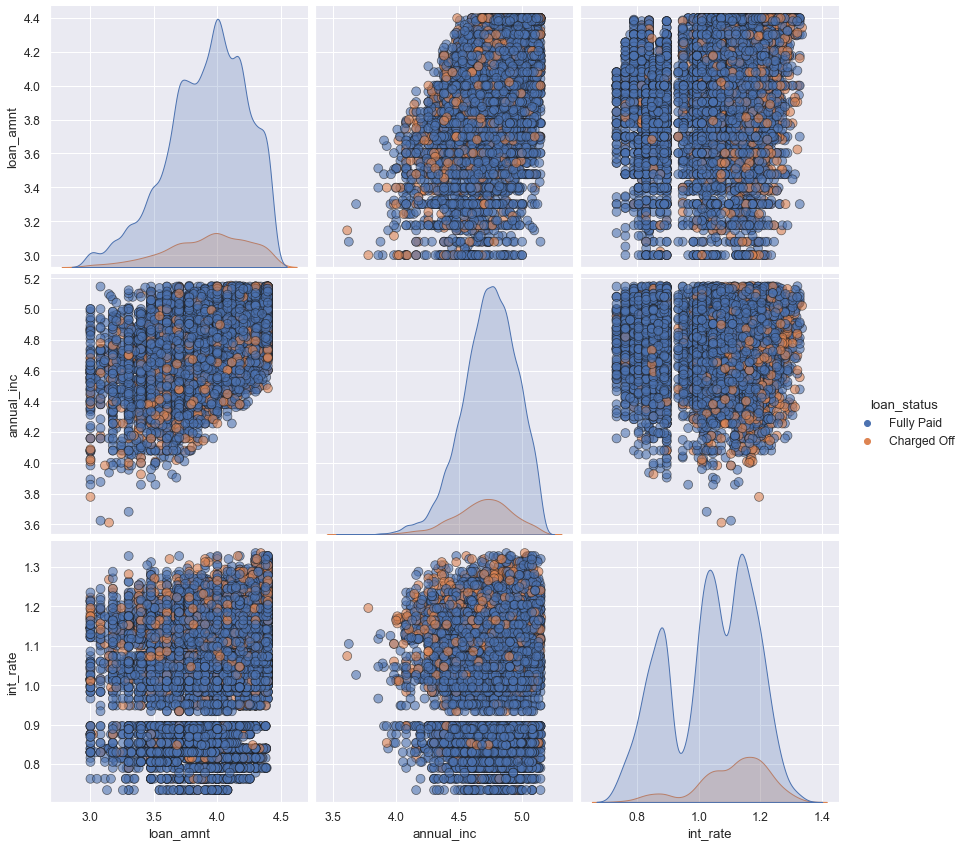

In [52]:
sns.pairplot(loan_pair[loan_pair['year'] == 2010], 
             vars = ['loan_amnt', 'annual_inc', 'int_rate'], 
             hue = 'loan_status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

# Observation:
# Higher the intrest rate higher charged off ratio
# Higher the annual income higher the loan amount slightly
# Intrest rate is increasing with loan amount increase this results in high charged off.

# Summary of Observations 

### - The above analysis is with respect to charged off loans where there is possibility of defaulting . The Probability of defaulting is as follows 

1) Applicants who receive interest at the rate of 13-17%  
2) Applicants who have an income of range 31k - 58k  
3) Applicants who have 20-37 open_acc  
4) Applicants with employement length of 10  
5) Applicants having house_ownership as 'RENT'  
6) Applicants who use the loan to clear other debt       
7) If dti is between 12-18   
8) When the purpose is 'debt_consolidation'  
9) Term is of 36 month  
10) loan amount between 5k-10k

### - Another important aspects seen here is charge off is higher in dec and in year 2011

# Further continuing the analysis with other parameters as below 

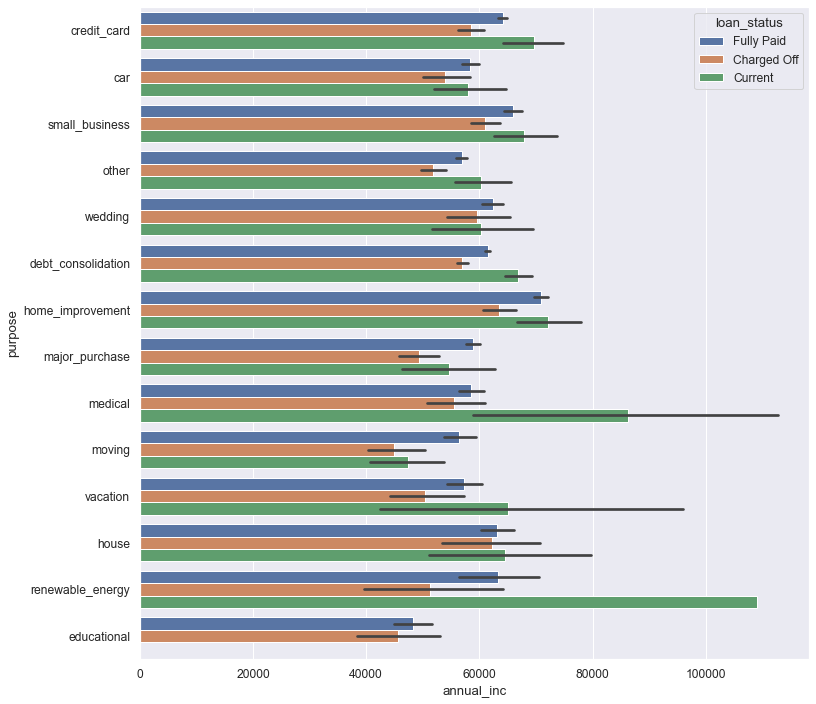

In [53]:
# checking loan vs income purpose 
plt.figure(figsize=(12,12))
sns.barplot(data =loan,x='annual_inc', y='purpose', hue ='loan_status')
plt.show()

#Observations 

# It is seen that applicants who have higher salary applied loans for small_business, Home_improvement and on renewable energy

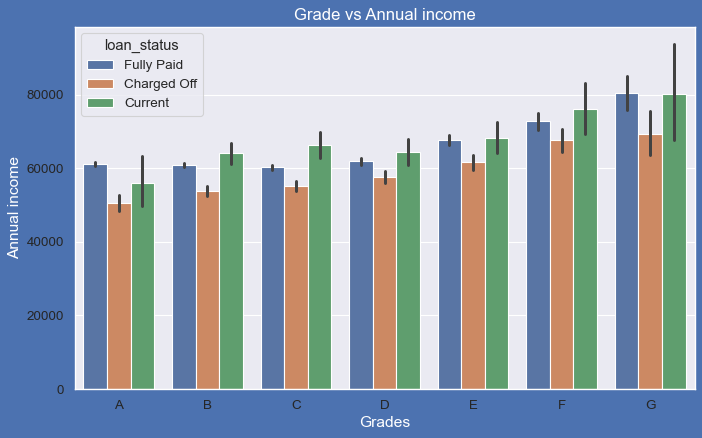

In [54]:
# BarPlot to show variation of annual income across grade for every loan status.

plt.figure(figsize=(10,6), dpi=80, facecolor='b', edgecolor='k')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=loan,order='ABCDEFG')
ax.set_title('Grade vs Annual income',fontsize=15,color='w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Grades',fontsize=14,color = 'w')
plt.show()

# Observations:
# From this we can conclude that the ones getting 'charged off' have lower annual incomes than the ones  who'paid fully' for each and every grade (i.e. at same interest range)

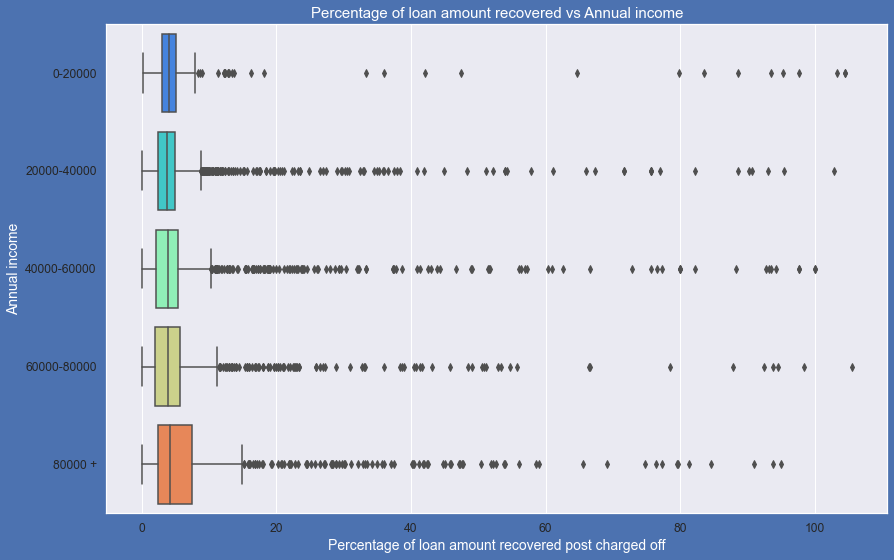

In [56]:
# Bivariate Analysis - Recoveries vs Annual income
# Box Plot
loan['recoveries']=pd.to_numeric(loan['recoveries'],errors='coerce')
loan_df_rec=loan[loan['recoveries'] > 0.00]

# calculate recovery percentage 
loan_df_rec['recovery_prcnt']=((loan_df_rec['recoveries']/loan_df_rec['loan_amnt']) * 100) 
loan['annual_inc_cats'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])
# plot
plt.figure(figsize=(14,9),facecolor='b')
ax=sns.boxplot(x='recovery_prcnt',y='annual_inc_cats',data=loan_df_rec,palette='rainbow')
ax.set_title('Percentage of loan amount recovered vs Annual income',fontsize=15,color = 'w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Percentage of loan amount recovered post charged off',fontsize=14,color = 'w')
plt.show()

# Observations:
# Higher percentage of loan amount is recovered when annual income is high.
# Plot shows no significant variation but there is slight increase in recovery percentage with increase in annual income.

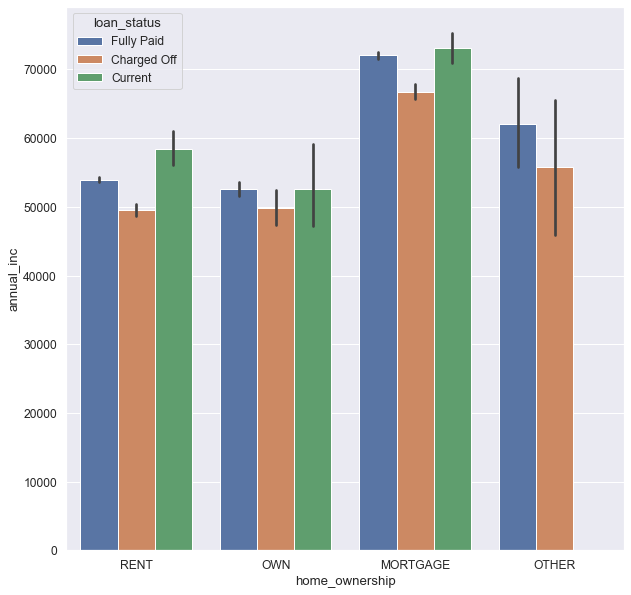

In [57]:
# annual income vs Home ownership 
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='home_ownership', y='annual_inc', hue ='loan_status')
plt.show()

#Observation 
#Applicant with home ownership as mortage has annual income of approximately 70k
#Followed by other with annual income of 60k approx

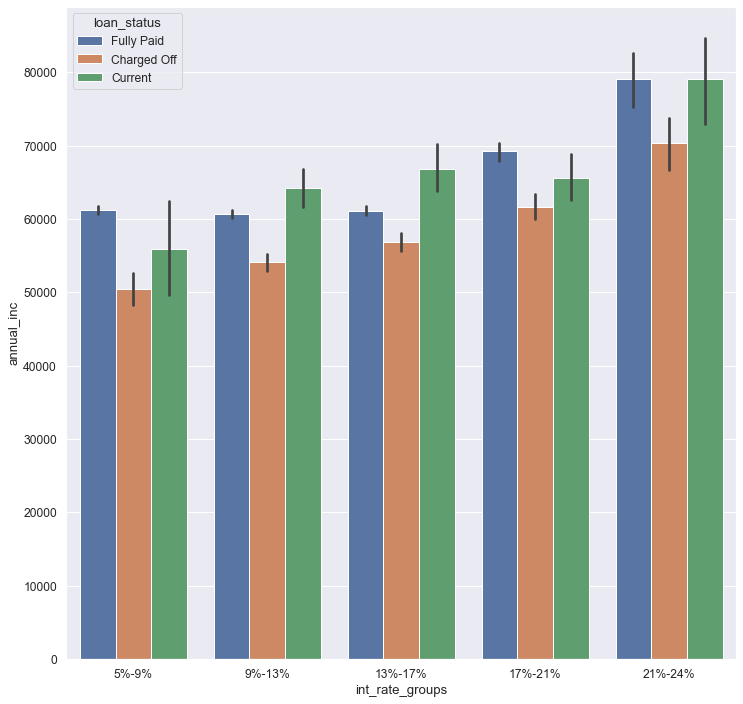

In [58]:
#Annual income vs int_rate

plt.figure(figsize=(12,12))
sns.barplot(data =loan,x='int_rate_groups', y='annual_inc', hue ='loan_status')
plt.show()

#Observation 

#It is seen that applicants with income of around 80k have highest interest rate in range 21-24%
# for Applicant with income of around 70k have interest rate of 17-24%
# The least interest rate 5-9% is applied for applicant with around 60k income 

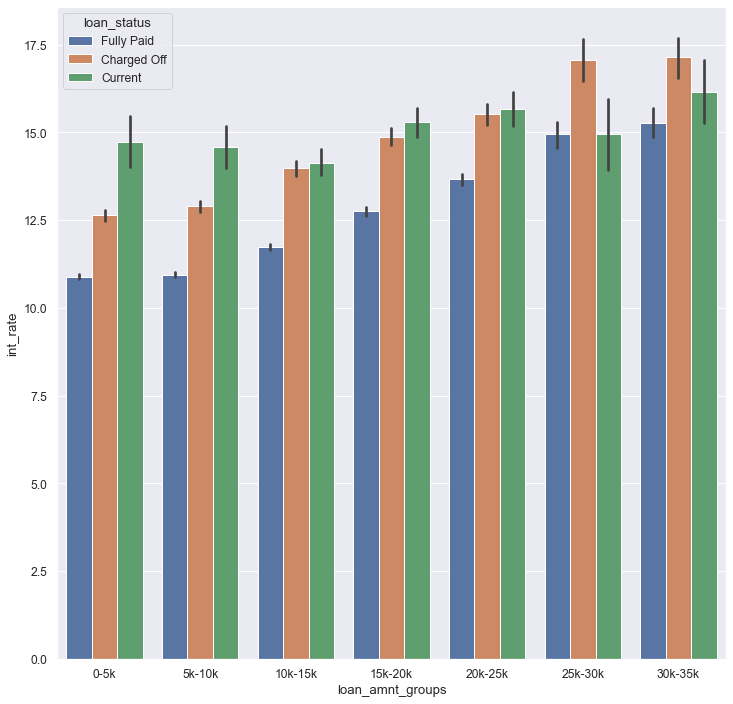

In [59]:
#Loan Amount and Interest Rate comparision 

plt.figure(figsize=(12,12))
sns.barplot(data =loan,x='loan_amnt_groups', y='int_rate', hue ='loan_status')
plt.show()

#observation 

#It is seen that for loan amount of 30-35k the interest rate is around 17.5%
# The least interest rate is 0f 12.5% with loan amount of 0-5k 

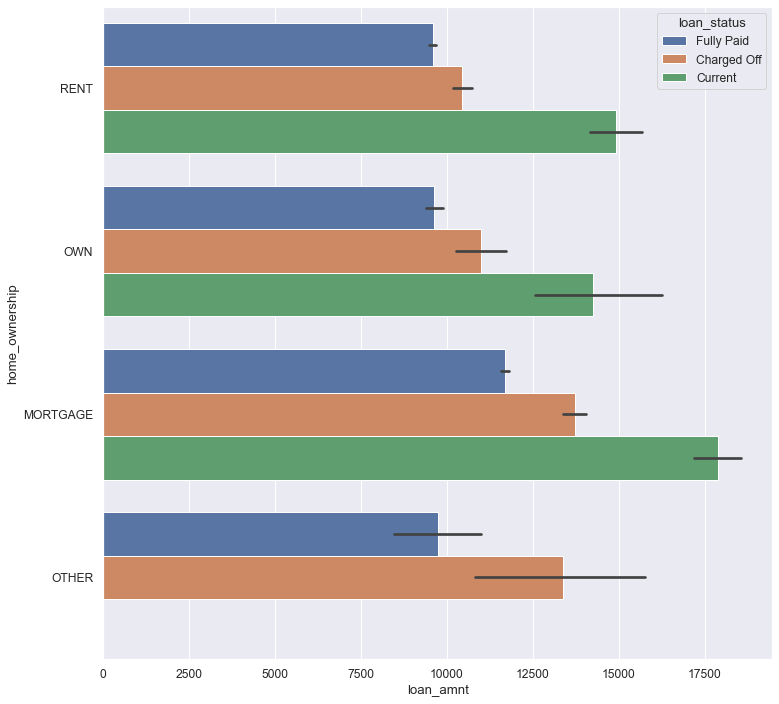

In [60]:
#Loan and House Ownership

plt.figure(figsize=(12,12))
sns.barplot(data =loan,x='loan_amnt', y='home_ownership', hue ='loan_status')
plt.show()

#observation 

# Applicants who have Mortgage have loan of amount 12.5k 
# Applicant with Rent have least loan amount of 10k 

# Summary of the observations

1) applicants who have higher salary applied loans for small_business, Home_improvement and on renewable energy  
2) Applicants getting 'charged off' have lower annual incomes than the ones who'paid fully' for each and every grade (i.e. at same interest range)  
3) Applicant with home ownership as mortage has annual income of approximately 70k  
4)  For loan amount of 30-35k the interest rate is around 17.5%